# Top 50 matplotlib Visualizations
machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#20.-Histogram-for-Continuous-Variable

- Correlation
    1. [Scatter Plot](#1.1-Scatter-Plot)
    2. [Scatter plot with linear regression line of best fit](#1.2-Scatter-plot-with-linear-regression-line-of-best-fit)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline  
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100}) # Set global figure size
pd.set_option('display.max_columns', None)

## 1.1 Scatter Plot

In [ ]:
# Import dataset 
midwest = pd.read_csv('data/midwest_filter.csv')

In [10]:
midwest.head()

,Unnamed: 0,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,124,96.712059,2.575276,0.148283,0.376759,0.187623,43298,75.107395,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,9,66.384340,32.900433,0.178807,0.451722,0.084698,6724,59.726353,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,34,96.571276,2.861717,0.233473,0.106731,0.226803,9669,69.334988,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,1139,95.254171,0.412257,0.149322,0.486918,3.697332,19272,75.472188,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,6,90.198766,9.372858,0.239890,0.085675,0.102810,3979,68.861523,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [11]:
categories = np.unique(midwest['category'])

In [12]:
categories

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

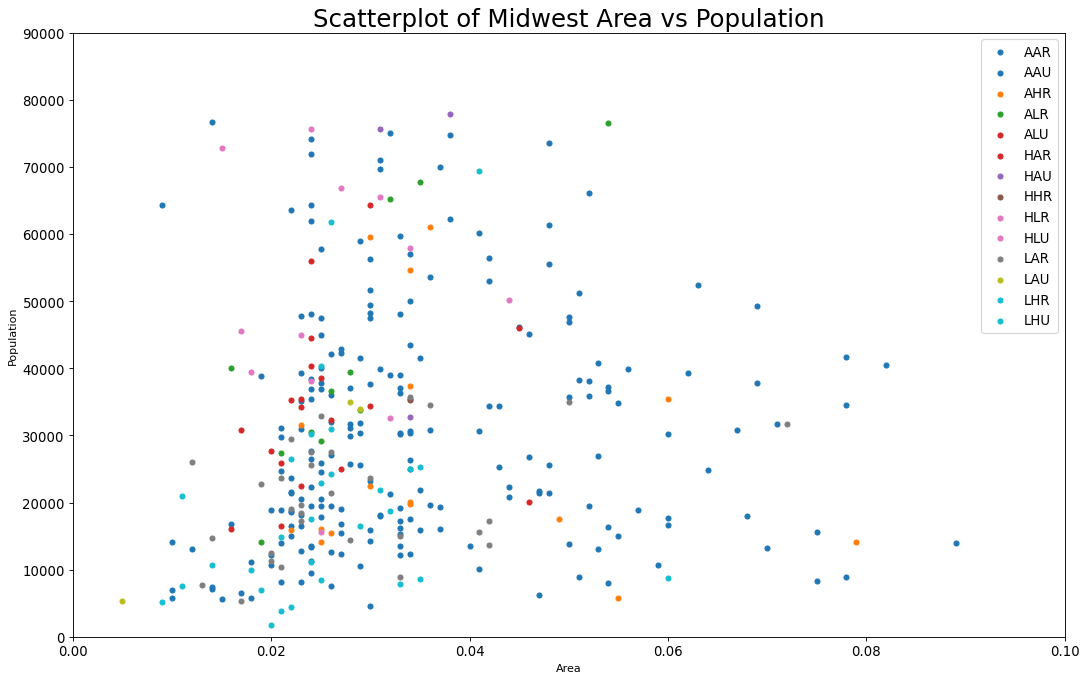

In [18]:
# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category']) 
#array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR', 'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest["category"] ==category, :], 
                s=20, color=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

## 1.2-Scatter plot with linear regression line of best fit

In [23]:
df = pd.read_csv("data/mpg_ggplot2.csv")

In [24]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


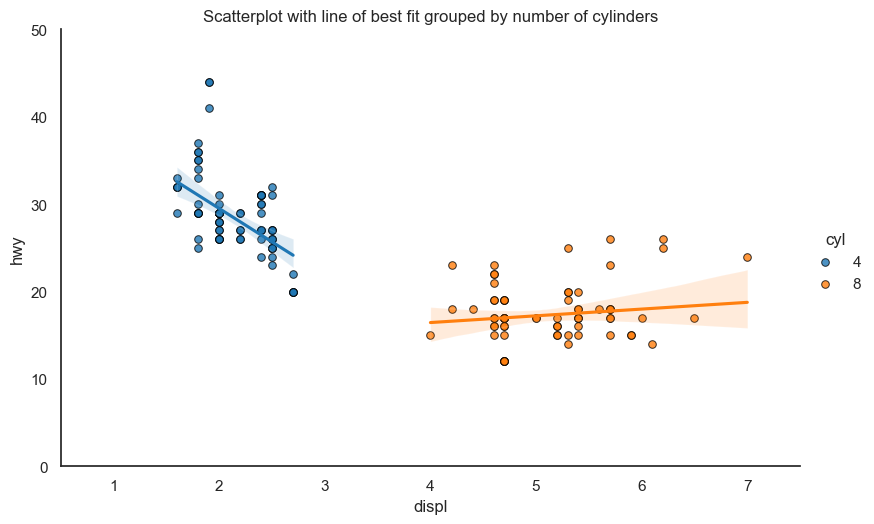

In [42]:
sns.set( rc = {'figure.figsize' : ( 5, 4 ), 
               'axes.labelsize' : 12 })

df_select = df.loc[df['cyl'].isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", data=df_select,                        # Columns to plot
                     hue="cyl",                                                 # Split by cylinder
                     height=5, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=30, linewidths=.7, edgecolors='black')) # Additional params for plt.scatter

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=12)

plt.show()

## 1.3 Jittering with stripplot

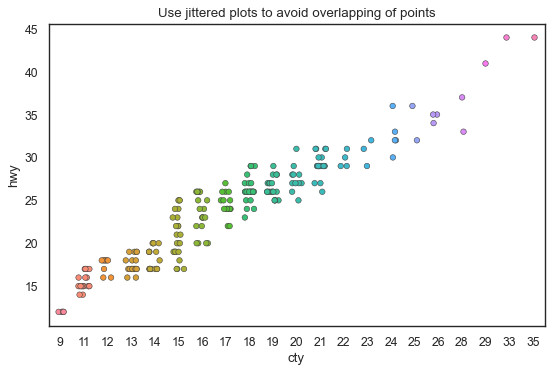

In [44]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(8,5), dpi= 80)    
sns.stripplot(x="cty", y="hwy", data=df,
              jitter=0.25, size=5, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=12)
plt.show()

## 1.4 Counts Plot

Another option to avoid the problem of points overlap is the increase the size of the dot depending on how many points lie in that spot.  
So, larger the size of the point more is the concentration of points around that.

In [2]:
df = pd.read_csv("data/mpg_ggplot2.csv")

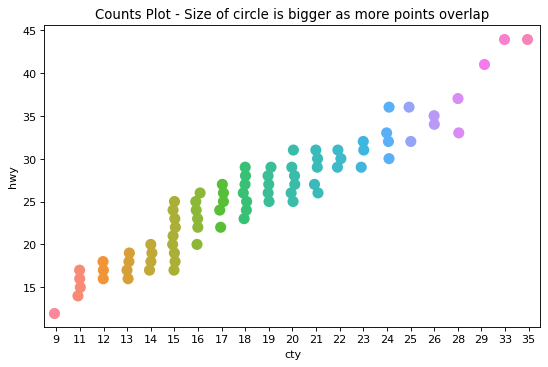

In [17]:
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(8,5), dpi= 80)    
sns.stripplot(x="cty", y="hwy", data=df_counts,
              s=10, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=12)
plt.show()

## 1.5 Marginal Histogram

In [19]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

<ipython-input-25-78ffb423c2b2>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_main.set_xticklabels(xlabels)


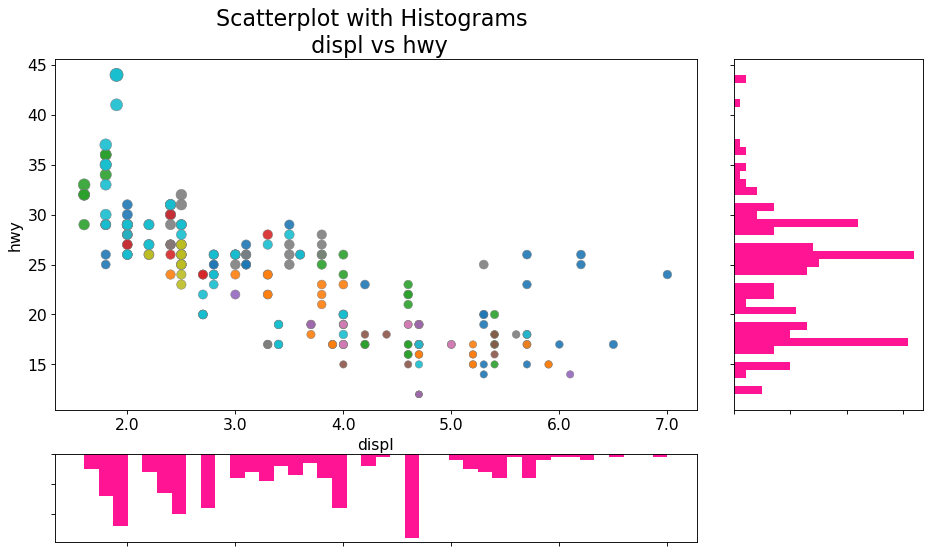

In [25]:
# Create Fig and gridspec
fig = plt.figure(figsize=(14, 8), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4,
                c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df,
                cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()